In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [149]:
def wrangle(path):
    df_tmp = pd.read_csv(path)
    df_tmp['order_date'] =  pd.to_datetime(df_tmp['order_date'])
    df_tmp.sort_values(by='order_date')
    df_tmp.reset_index(drop=True)
    df_tmp.rename(columns = {'order_date':'ds', 'sales_total':'y'}, inplace = True)
    return df_tmp
def add_aov(df):
    df['AOV'] = df['y']/df['total_order']
def append_df(df1,df2):
    df3 = df1.append(df2, ignore_index=True)
    return df3
def aov_range(x):
    #Dibagi 4 Quartile, Q3 dibuang
    if x <= 6.806514e+05:
        return 'low'
    elif 6.806514e+05 < x <= 7.538420e+05:
        return 'medium'
    elif 7.538420e+05< x <= 8.184672e+05:
        return 'medium-high'
    elif x > 8.184672e+05:
        return 'high'
    
def nambah_aov(df):
    df['aov_kategorik'] = df['AOV'].apply(lambda x: aov_range(x))
    return df
def encode(df):
    df["aov_kategorik"] = df["aov_kategorik"].astype('category')
    df = pd.get_dummies(df,columns=['aov_kategorik'])
    return df
def mape(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/ y_true)) *100

In [150]:
df1 = wrangle('Dataset Train Mei.csv')
df2 = wrangle('mei.csv')
df_base = append_df(df1,df2)
add_aov(df1)
add_aov(df2)
add_aov(df_base)
df1 = nambah_aov(df1)
df2 = nambah_aov(df2)
df_base = nambah_aov(df_base)
df1 = encode(df1)
df2 = encode(df2)
df_base = encode(df_base)

In [151]:
df3 = df_base.iloc[291:]
df3.reset_index(drop = True)

,ds,qty,y,shipping_amount,total_order,AOV,aov_kategorik_high,aov_kategorik_low,aov_kategorik_medium,aov_kategorik_medium-high
0,2021-10-19,2418,792606185,36893498.98,811,9.773196e+05,1,0,0,0
1,2021-10-20,2509,738827095,41146999.85,896,8.245838e+05,1,0,0,0
2,2021-10-21,2334,688925899,39550500.01,845,8.152969e+05,0,0,0,1
3,2021-10-22,1832,599023636,35445500.18,725,8.262395e+05,1,0,0,0
4,2021-10-23,2052,619701664,29881000.15,807,7.679079e+05,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
220,2022-05-27,2594,860972777,32462750.13,889,9.684733e+05,1,0,0,0
221,2022-05-28,2208,598901014,25883500.06,831,7.206992e+05,0,0,1,0
222,2022-05-29,2779,706611951,31184999.54,975,7.247302e+05,0,0,1,0
223,2022-05-30,2984,849215021,35479999.97,1006,8.441501e+05,1,0,0,0


In [152]:
df_t = pd.read_csv('traffic mei.csv')
df_t['event_date'] = pd.to_datetime(df_t['event_date'])


In [153]:
df_new = pd.merge(df3, df_t, left_on='ds', right_on='event_date')
df_new.drop(columns = ['event_date'], inplace = True)
df_new.drop(columns = ['session_ace_count', 'session_informa_count', 'session_toys_kingdom_count','install_count','uninstall_count','shipping_amount'], inplace = True)
df_new

,ds,qty,y,total_order,AOV,aov_kategorik_high,aov_kategorik_low,aov_kategorik_medium,aov_kategorik_medium-high,session_rr_count,session_start_count
0,2021-10-19,2418,792606185,811,9.773196e+05,1,0,0,0,24575,50689
1,2021-10-20,2509,738827095,896,8.245838e+05,1,0,0,0,34986,74840
2,2021-10-21,2334,688925899,845,8.152969e+05,0,0,0,1,34016,69797
3,2021-10-22,1832,599023636,725,8.262395e+05,1,0,0,0,32508,66486
4,2021-10-23,2052,619701664,807,7.679079e+05,0,0,0,1,32970,64520
...,...,...,...,...,...,...,...,...,...,...,...
165,2022-05-27,2594,860972777,889,9.684733e+05,1,0,0,0,62972,148856
166,2022-05-28,2208,598901014,831,7.206992e+05,0,0,1,0,75407,169034
167,2022-05-29,2779,706611951,975,7.247302e+05,0,0,1,0,77693,162582
168,2022-05-30,2984,849215021,1006,8.441501e+05,1,0,0,0,77798,166359


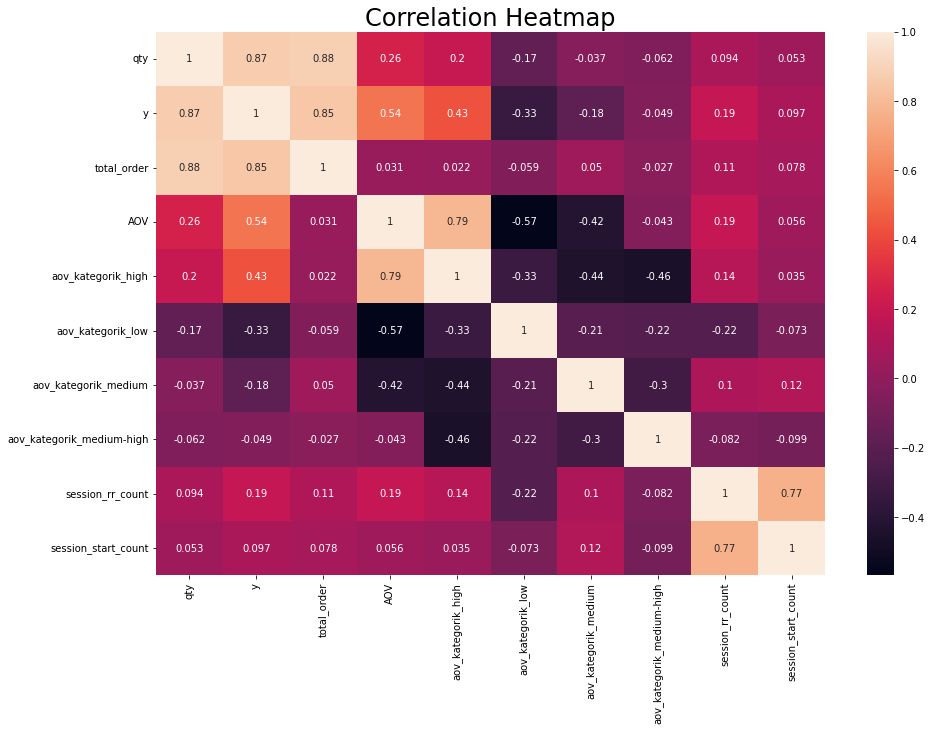

In [154]:
plt.figure(figsize=(15,10))
cor = df_new.corr()
sns.heatmap(cor,annot=True)
plt.title("Correlation Heatmap", size = 24)
plt.show()

In [155]:
df_train = df_new.iloc[:-7]

In [156]:
df_test = df_new.iloc[-7:]

In [157]:
mod = Prophet()
# mod.add_regressor('aov_kategorik_high')
# mod.add_regressor('aov_kategorik_medium')
# mod.add_regressor('aov_kategorik_low')
mod.add_regressor('total_order')
mod.add_regressor('qty')
mod.add_regressor('session_start_count')
mod.add_regressor('AOV')
model_prophet = mod.fit(df_train)
fut = mod.make_future_dataframe(periods = 7,freq='D')
fut['aov_kategorik_high'] = df_new['aov_kategorik_high']
fut['aov_kategorik_medium'] = df_new['aov_kategorik_medium']
fut['aov_kategorik_low'] = df_new['aov_kategorik_low']
fut['total_order'] = df_new['total_order']
fut['qty'] = df_new['qty']
fut['session_start_count'] = df_new['session_start_count']
fut['AOV']=df_new['AOV']
forecast = mod.predict(fut)
predictions = forecast['yhat'].iloc[-7:]
rmse_result = mean_squared_error(df_test.y, predictions, squared = False)
mae_result = mean_absolute_error(df_test.y, predictions)
mape_result = mape(df_test.y, predictions)
diff = sum(df_test.y) - sum(predictions)
percent_diff = abs(sum(df_test.y) - sum(predictions))/sum(df_test.y) *100
metrics = {"RMSE": rmse_result,"MAE": mae_result,"MAPE": mape_result, 'Actual - Predictions': diff, 'Percent Difference': percent_diff}
print('Performance Metrics:')
print('RMSE: ',rmse_result)
print('MAE:  ', mae_result)
print('MAPE: ', mape_result)
print('-----------------------')
print('Difference in Testing (Aggregate Weekly)')
print(f'Aktual - Prediksi: {diff}')
print(f'Percent Difference: {percent_diff}')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Performance Metrics:
RMSE:  10514101.592310034
MAE:   8066759.730395777
MAPE:  0.9583165582932854
-----------------------
Difference in Testing (Aggregate Weekly)
Aktual - Prediksi: -375809.3152999878
Percent Difference: 0.006739522381346187


In [158]:
forecast[['ds','yhat']]
forecast.set_index('ds')

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,AOV,AOV_lower,AOV_upper,additive_terms,additive_terms_lower,...,total_order,total_order_lower,total_order_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2021-10-19,7.578690e+08,7.864154e+08,8.216587e+08,7.578690e+08,7.578690e+08,1.757618e+08,1.757618e+08,1.757618e+08,4.609897e+07,4.609897e+07,...,-1.228587e+08,-1.228587e+08,-1.228587e+08,-3.346114e+06,-3.346114e+06,-3.346114e+06,0.0,0.0,0.0,8.039680e+08
2021-10-20,7.583955e+08,7.183972e+08,7.541624e+08,7.583955e+08,7.583955e+08,3.045255e+07,3.045255e+07,3.045255e+07,-2.250196e+07,-2.250196e+07,...,-5.188609e+07,-5.188609e+07,-5.188609e+07,4.973851e+05,4.973851e+05,4.973851e+05,0.0,0.0,0.0,7.358936e+08
2021-10-21,7.589221e+08,6.656572e+08,6.985209e+08,7.589221e+08,7.589221e+08,2.161722e+07,2.161722e+07,2.161722e+07,-7.664110e+07,-7.664110e+07,...,-9.446968e+07,-9.446968e+07,-9.446968e+07,-1.081888e+06,-1.081888e+06,-1.081888e+06,0.0,0.0,0.0,6.822810e+08
2021-10-22,7.594486e+08,5.701357e+08,6.045546e+08,7.594486e+08,7.594486e+08,3.202773e+07,3.202773e+07,3.202773e+07,-1.716183e+08,-1.716183e+08,...,-1.946663e+08,-1.946663e+08,-1.946663e+08,-3.672988e+06,-3.672988e+06,-3.672988e+06,0.0,0.0,0.0,5.878303e+08
2021-10-23,7.599752e+08,5.957222e+08,6.306915e+08,7.599752e+08,7.599752e+08,-2.346759e+07,-2.346759e+07,-2.346759e+07,-1.461786e+08,-1.461786e+08,...,-1.261986e+08,-1.261986e+08,-1.261986e+08,7.860995e+06,7.860995e+06,7.860995e+06,0.0,0.0,0.0,6.137965e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,7.579491e+08,8.491996e+08,8.838541e+08,7.578835e+08,7.580280e+08,1.673456e+08,1.673456e+08,1.673456e+08,1.092478e+08,1.092478e+08,...,-5.773090e+07,-5.773090e+07,-5.773090e+07,-3.672988e+06,-3.672988e+06,-3.672988e+06,0.0,0.0,0.0,8.671969e+08
2022-05-28,7.579483e+08,5.758613e+08,6.131221e+08,7.577682e+08,7.581300e+08,-6.838084e+07,-6.838084e+07,-6.838084e+07,-1.640013e+08,-1.640013e+08,...,-1.061593e+08,-1.061593e+08,-1.061593e+08,7.860995e+06,7.860995e+06,7.860995e+06,0.0,0.0,0.0,5.939470e+08
2022-05-29,7.579474e+08,6.996347e+08,7.346730e+08,7.576450e+08,7.582831e+08,-6.454582e+07,-6.454582e+07,-6.454582e+07,-4.172609e+07,-4.172609e+07,...,1.407671e+07,1.407671e+07,1.407671e+07,3.724318e+06,3.724318e+06,3.724318e+06,0.0,0.0,0.0,7.162213e+08


In [159]:
df_new.set_index('ds')

,qty,y,total_order,AOV,aov_kategorik_high,aov_kategorik_low,aov_kategorik_medium,aov_kategorik_medium-high,session_rr_count,session_start_count
ds,,,,,,,,,,
2021-10-19,2418,792606185,811,9.773196e+05,1,0,0,0,24575,50689
2021-10-20,2509,738827095,896,8.245838e+05,1,0,0,0,34986,74840
2021-10-21,2334,688925899,845,8.152969e+05,0,0,0,1,34016,69797
2021-10-22,1832,599023636,725,8.262395e+05,1,0,0,0,32508,66486
2021-10-23,2052,619701664,807,7.679079e+05,0,0,0,1,32970,64520
...,...,...,...,...,...,...,...,...,...,...
2022-05-27,2594,860972777,889,9.684733e+05,1,0,0,0,62972,148856
2022-05-28,2208,598901014,831,7.206992e+05,0,0,1,0,75407,169034
2022-05-29,2779,706611951,975,7.247302e+05,0,0,1,0,77693,162582


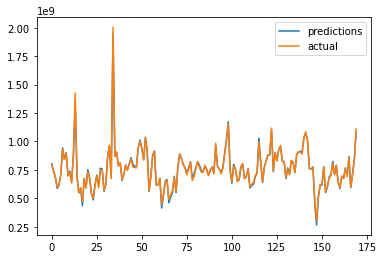

In [160]:
plt.plot(forecast['yhat'],label = 'predictions')
plt.plot(df_new['y'],label = 'actual')
plt.legend()

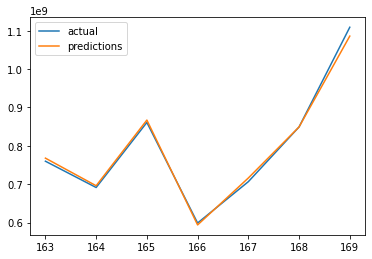

In [161]:
plt.plot(df_new['y'][-7:],label = 'actual')
plt.plot(forecast['yhat'][-7:],label = 'predictions')
plt.legend()

In [162]:
df_base = pd.merge(df_base, df_t, left_on='ds', right_on='event_date')
df_base.drop(columns = ['event_date'], inplace = True)
df_base.drop(columns = ['session_ace_count', 'session_informa_count', 'session_toys_kingdom_count','install_count','uninstall_count','shipping_amount'], inplace = True)
df_base

,ds,qty,y,total_order,AOV,aov_kategorik_high,aov_kategorik_low,aov_kategorik_medium,aov_kategorik_medium-high,session_rr_count,session_start_count
0,2021-11-01,2154,551583415,729,7.566302e+05,0,0,0,1,42829,81002
1,2021-12-01,1982,475854420,672,7.081167e+05,0,0,1,0,49055,85867
2,2021-11-02,1522,365832045,592,6.179595e+05,0,1,0,0,46705,89240
3,2021-12-02,1629,397285915,601,6.610415e+05,0,1,0,0,50324,90727
4,2021-11-03,1740,395952690,622,6.365799e+05,0,1,0,0,47602,88014
...,...,...,...,...,...,...,...,...,...,...,...
185,2022-05-27,2594,860972777,889,9.684733e+05,1,0,0,0,62972,148856
186,2022-05-28,2208,598901014,831,7.206992e+05,0,0,1,0,75407,169034
187,2022-05-29,2779,706611951,975,7.247302e+05,0,0,1,0,77693,162582
188,2022-05-30,2984,849215021,1006,8.441501e+05,1,0,0,0,77798,166359


In [163]:
df_train_base = df_base.iloc[:-7]
df_test_base = df_base.iloc[-7:]

In [164]:
mod = Prophet()
mod.add_regressor('aov_kategorik_high')
mod.add_regressor('aov_kategorik_medium')
mod.add_regressor('aov_kategorik_low')
mod.add_regressor('total_order')
mod.add_regressor('qty')
mod.add_regressor('session_start_count')
model_prophet = mod.fit(df_train_base)
fut = mod.make_future_dataframe(periods = 7,freq='D')
fut['aov_kategorik_high'] = df_base['aov_kategorik_high']
fut['aov_kategorik_medium'] = df_base['aov_kategorik_medium']
fut['aov_kategorik_low'] = df_base['aov_kategorik_low']
fut['total_order'] = df_base['total_order']
fut['qty'] = df_base['qty']
fut['session_start_count'] = df_base['session_start_count']
forecast = mod.predict(fut)
predictions = forecast['yhat'].iloc[-7:]
rmse_result = mean_squared_error(df_test_base.y, predictions, squared = False)
mae_result = mean_absolute_error(df_test_base.y, predictions)
mape_result = mape(df_test_base.y, predictions)
diff = sum(df_test_base.y) - sum(predictions)
percent_diff = abs(sum(df_test_base.y) - sum(predictions))/sum(df_test_base.y) *100
metrics = {"RMSE": rmse_result,"MAE": mae_result,"MAPE": mape_result, 'Actual - Predictions': diff, 'Percent Difference': percent_diff}
print('Performance Metrics:')
print('RMSE: ',rmse_result)
print('MAE:  ', mae_result)
print('MAPE: ', mape_result)
print('-----------------------')
print('Difference in Testing (Aggregate Weekly)')
print(f'Aktual - Prediksi: {diff}')
print(f'Percent Difference: {percent_diff}')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Performance Metrics:
RMSE:  61789976.635304116
MAE:   41019488.82338534
MAPE:  4.448907750231242
-----------------------
Difference in Testing (Aggregate Weekly)
Aktual - Prediksi: 177424921.8896246
Percent Difference: 3.1818243545379272


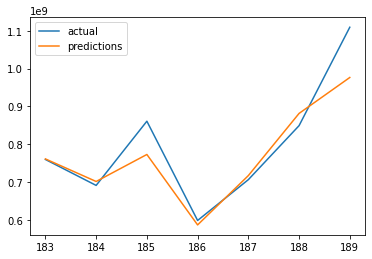

In [165]:
df_test_base.set_index('ds')
forecast.set_index('ds')
plt.plot(df_test_base['y'],label = 'actual')
plt.plot(forecast['yhat'].iloc[-7:],label = 'predictions')
plt.legend()